In [1]:
# import pandas as pd # TODO: find uses later
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MIN_CUE_WGT, MAX_CUE_WGT = 420, 550  # grams
MIN_BALL_WGT, MAX_BALL_WGT = 205, 220  # grams
MIN_BR_LEN, MAX_BR_LEN = 1, 25  # centimeters
MIN_VEL, MAX_VEL = 0.05, 3.5  # m/s, from caromball.com

In [3]:
cue_weights = np.linspace(MIN_CUE_WGT, MAX_CUE_WGT, num=MAX_CUE_WGT - MIN_CUE_WGT, dtype=np.int16)
proj_vel = np.linspace(MIN_VEL, MAX_VEL, num=50)

In [4]:
xv, yv = np.meshgrid(cue_weights, proj_vel)

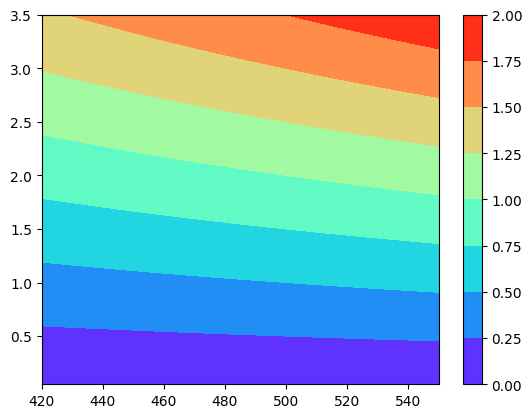

In [5]:
fv = (xv / 1000) * yv  # millinewtons (mN)
# as explained by Bard, https://g.co/bard/share/5a3135633c24
# the 2mN at top is too weak

plt.contourf(xv, yv, fv, cmap='rainbow')
plt.colorbar()
plt.show()

seems F=mv is not correct [as it represents the internal force of object in motion instead]

now try applying Impulse-Momentum, https://openstax.org/books/physics/pages/8-1-linear-momentum-force-and-impulse

mainly we have 𝐅net=𝑚𝐚 and Δ𝐯/Δ𝑡=𝐚 with
- v0 and t0 = 0
- Δ𝐯 eq proj_vel
- Δt will range from 0.5s to 3s

In [6]:
dtime = np.arange(0.5, 3, step=0.1)  # ideal
# dtime = np.arange(1, 3, step=0.1)  # realistic

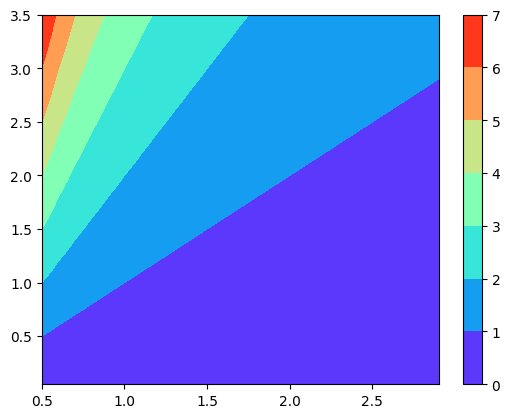

In [7]:
xv, yv =  np.meshgrid(proj_vel, dtime)
acc = xv / yv  # m/(s**2)
# yv is time deltas so plotted as x axis for better perception
plt.contourf(yv, xv, acc, cmap='rainbow')
plt.colorbar()
plt.show()

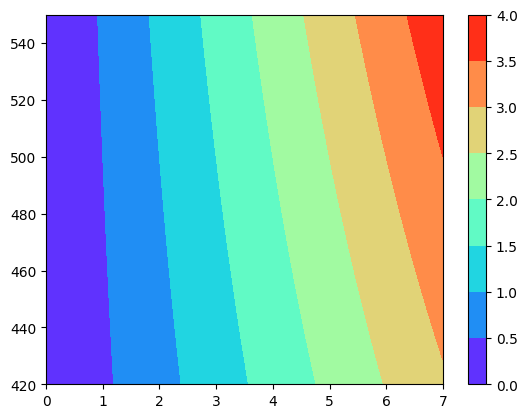

In [8]:
# based on observed plot above
accels = np.linspace(0, 7)
mm, aa =  np.meshgrid(cue_weights, accels)
fnet = (mm / 1000) * aa

plt.contourf(aa, mm, fnet, cmap='rainbow')
plt.colorbar()
plt.show()